### The following graph is the decision tree on two blobs data discussed in the class.    

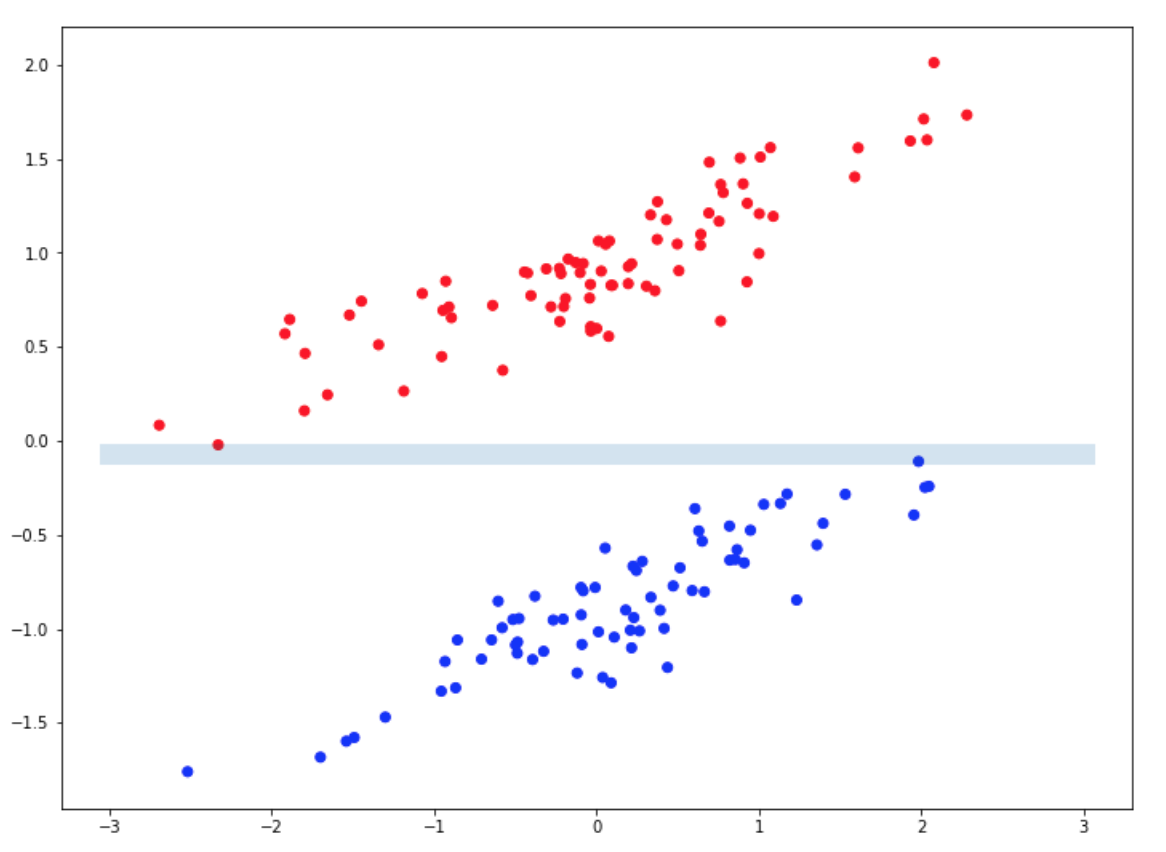

### Use the follow codes to get concentric circles and plot the tree as in the two blobs problem.  Be aware that it may have more than 1 layers of the tree (that is what in two blobs problem).
-------
- from sklearn.datasets import make_circles
- def Get_Circles_data(ShowGraph=1) :
    - X, y = make_circles(n_samples=1000, random_state=2000, noise=0.05, factor=0.3)  
    - if ShowGraph == 1 :
        - plt.scatter(X[:,0], X[:, 1], c=y)
    - return X, y

- X, y = Get_Circles_data()


## Import

In [13]:
import math
import json
from timeit import default_timer as timer
import concurrent.futures as cf  # doesn't work with sklearn
import pandas as pd
import numpy as np
import copy as copy
import statistics as stt
import seaborn as sns
from os import system, getcwd, startfile
from os.path import join
from time import time
from scipy.io import arff
from sklearn import tree
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter


## Class

In [14]:
class w10hw():
    def __init__(self):
        pass

    def generate_data(self, show=False, cmap='default'):
        '''
        Generate a dataset and plot it
        '''
        self.X, self.y = make_circles(n_samples=1000, random_state=2000, factor=.3, noise=.05)
        
        if show:
            if cmap == 'default':
                plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
            else:
                plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap=cmap)

    def normalize_data(self):
        '''
        Data is normalized so no need to do this.
        '''
        pass

    def show_data_info(self, shape=False, dtype=False, data=False):
        '''
        Print basic info about source data.
        '''
        if shape:
            print(f"X shape: {self.X.shape}")
            print(f"y shape: {self.y.shape}")
        if dtype:
            print(f"X dtype: {self.X.dtype}")
            print(f"y dtype: {self.y.dtype}")
        if data:
            print(f"X data: {self.X}")
            print(f"y data: {self.y}")


    def split_data(self):
        '''
        Split the data into training and testing
        '''
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.25, random_state=2018)

    def build_model(self, model_name=[]):
        '''
        Build models of different algorithms
        '''
        self.model_name = model_name
        self.model = []
        for x in model_name:
            if x == 'DT':
                self.model.append([x, DecisionTreeClassifier()])
            elif x == 'DT_weighted':
                self.model.append([x, DecisionTreeClassifier(class_weight='balanced')])
            elif x == 'RF':
                self.model.append([x, RandomForestClassifier()])
            elif x == 'RF_weighted':
                self.model.append([x, RandomForestClassifier(class_weight='balanced')])
            elif x == 'KNN':
                self.model.append([x, KNeighborsClassifier()])
            elif x == 'KNN_weighted':
                self.model.append([x, KNeighborsClassifier(weights='distance')])
            elif x == 'SVM':
                self.model.append([x, SVC()])
            elif x == 'SVM_weighted':
                self.model.append([x, SVC(class_weight='balanced')])
            elif x == 'LR':
                self.model.append([x, LogisticRegression()])
            elif x == 'LR_weighted':
                self.model.append([x, LogisticRegression(class_weight='balanced')])
            else:
                print(f"Model {x} is not supported.")

    def train_model(self):
        '''
        Train the model
        '''
        for x in self.model:
            x[1].fit(self.X_train, self.y_train)

    def test_model(self, precision=4):
        '''
        Test the model
        '''
        self.y_train_pred = []
        self.y_test_pred = []
        self.y_train_acc = []
        self.y_test_acc = []
        for x in self.model:
            self.y_train_pred.append(x[1].predict(self.X_train))
            self.y_test_pred.append(x[1].predict(self.X_test))
            self.y_train_acc.append(round(accuracy_score(
                self.y_train, self.y_train_pred[-1]), precision))
            self.y_test_acc.append(round(accuracy_score(
                self.y_test, self.y_test_pred[-1]), precision))

    def test_overfit(self, precision=4):
        '''
        Test overfitting
        '''
        self.y_acc_diff = []
        for x in range(len(self.model)):
            self.y_acc_diff.append(
                [self.model_name[x], round(self.y_train_acc[x] - self.y_test_acc[x], precision)])

    def plot_DTRF_tree(self, save=False):
        '''
        Plot the decision tree
        '''
        for x in range(len(self.model)):
            plt.figure(dpi=300)
            if self.model_name[x] == 'DT' or self.model_name[x] == 'DT_weighted':
                tree.plot_tree(self.model[x][1])
            elif self.model_name[x] == 'RF' or self.model_name[x] == 'RF_weighted':
                tree.plot_tree(self.model[x][1].estimators_[0])
            # plt.show()
            if save:
                path = join(getcwd().rstrip('src'),
                            'pic/ML_w10_hw/{0}.png'.format(self.model_name[x])).replace('\\', '/')
                plt.savefig(path)

    def plot_divided_data(self, show=False, cmap='default'):
        '''
        Generate a dataset and plot it
        '''
        if show:
            if cmap == 'default':
                plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y)
            else:
                plt.scatter(self.X[:, 0], self.X[:, 1], c=self.y, cmap=cmap)


## Draw Tree

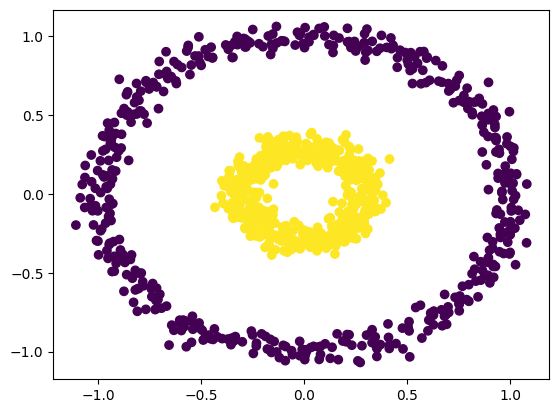

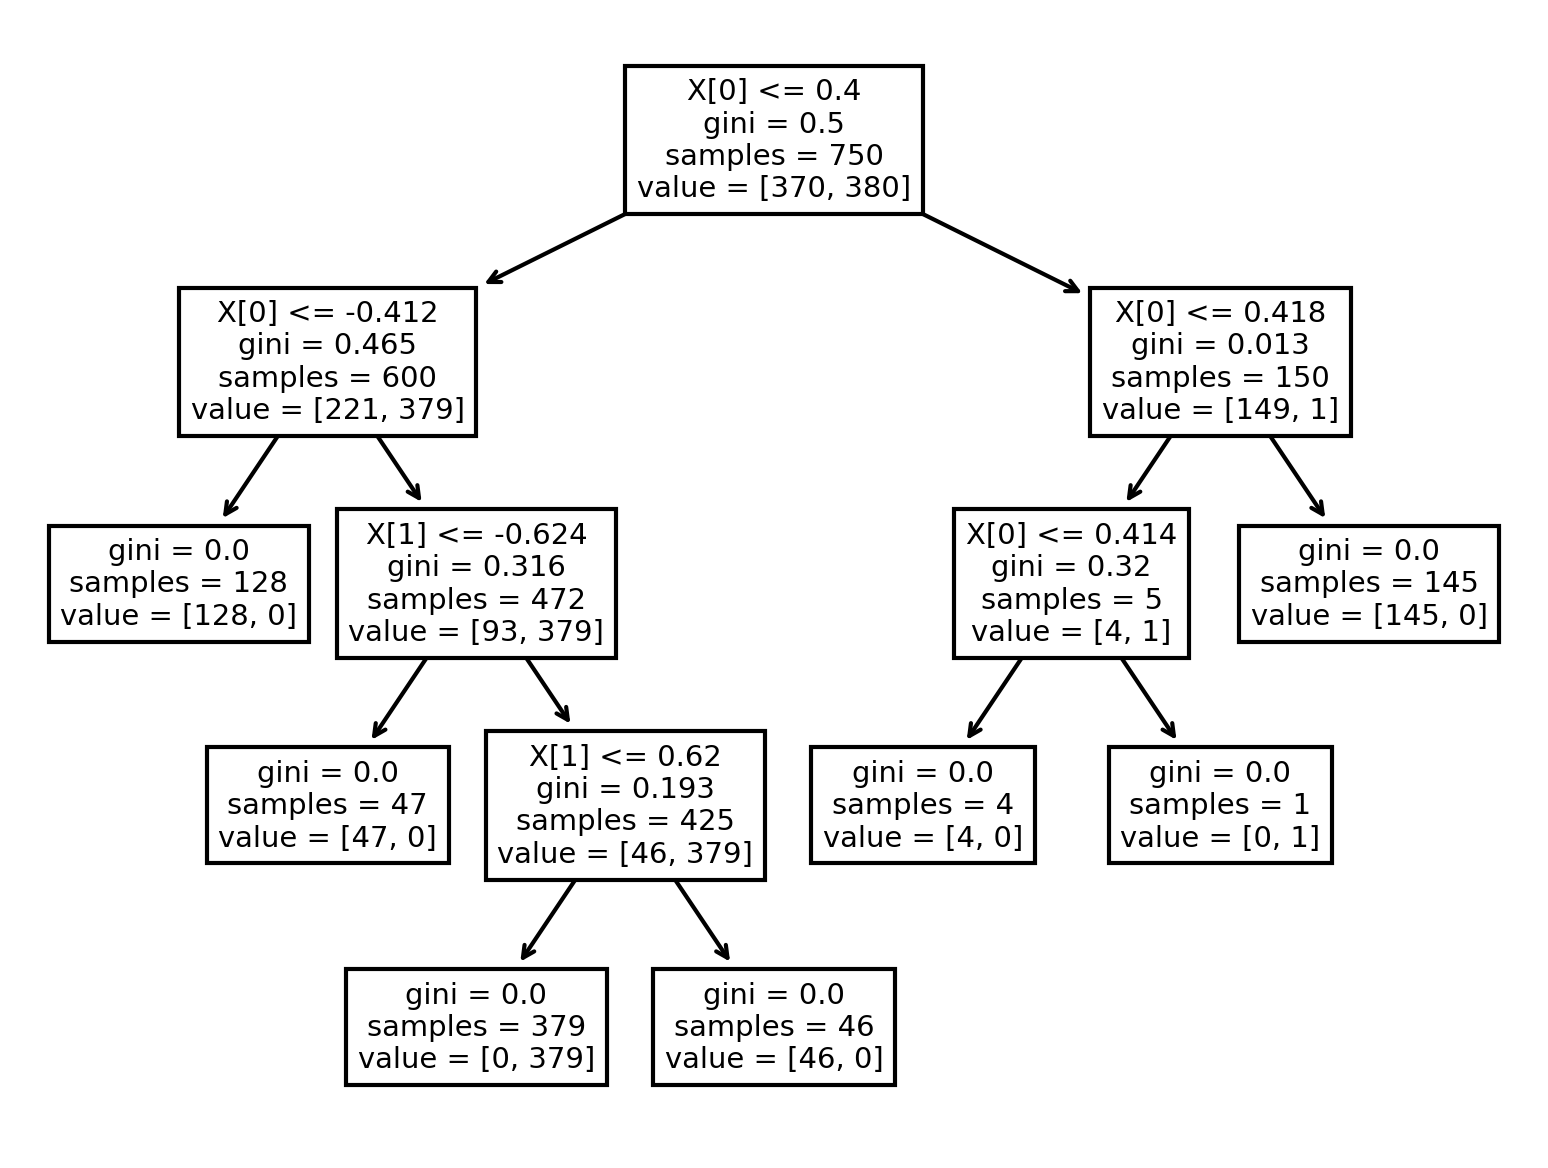

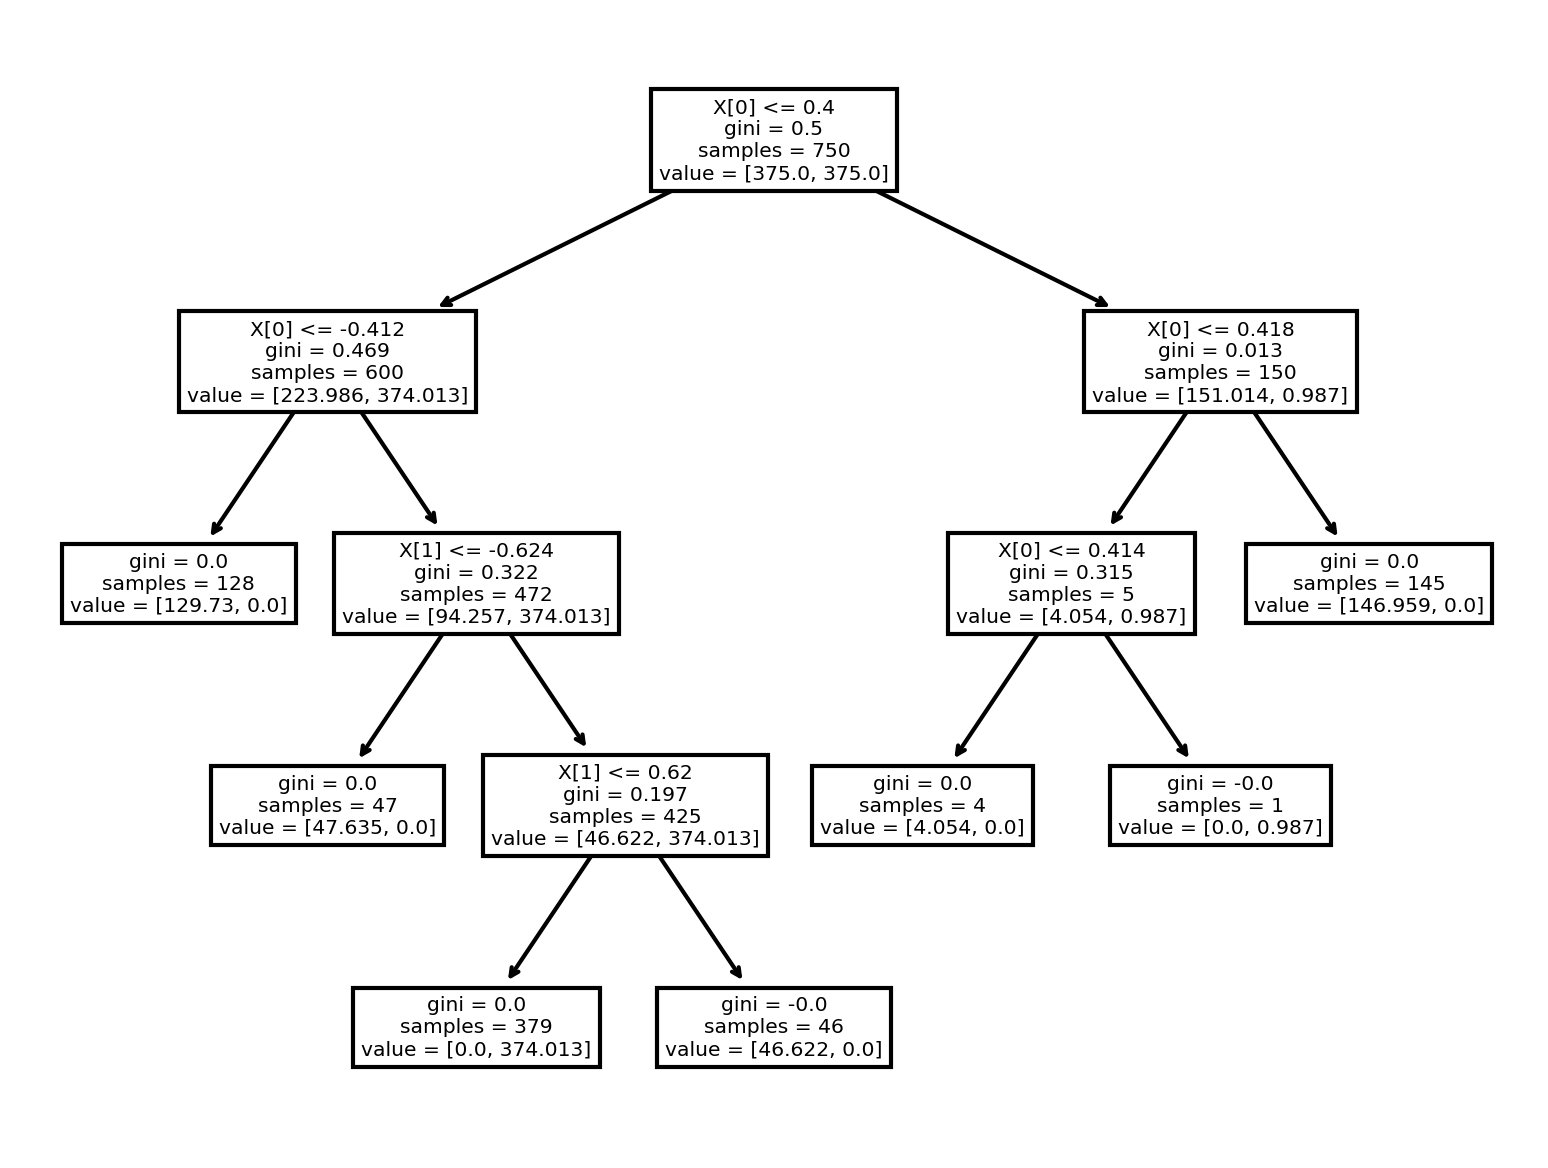

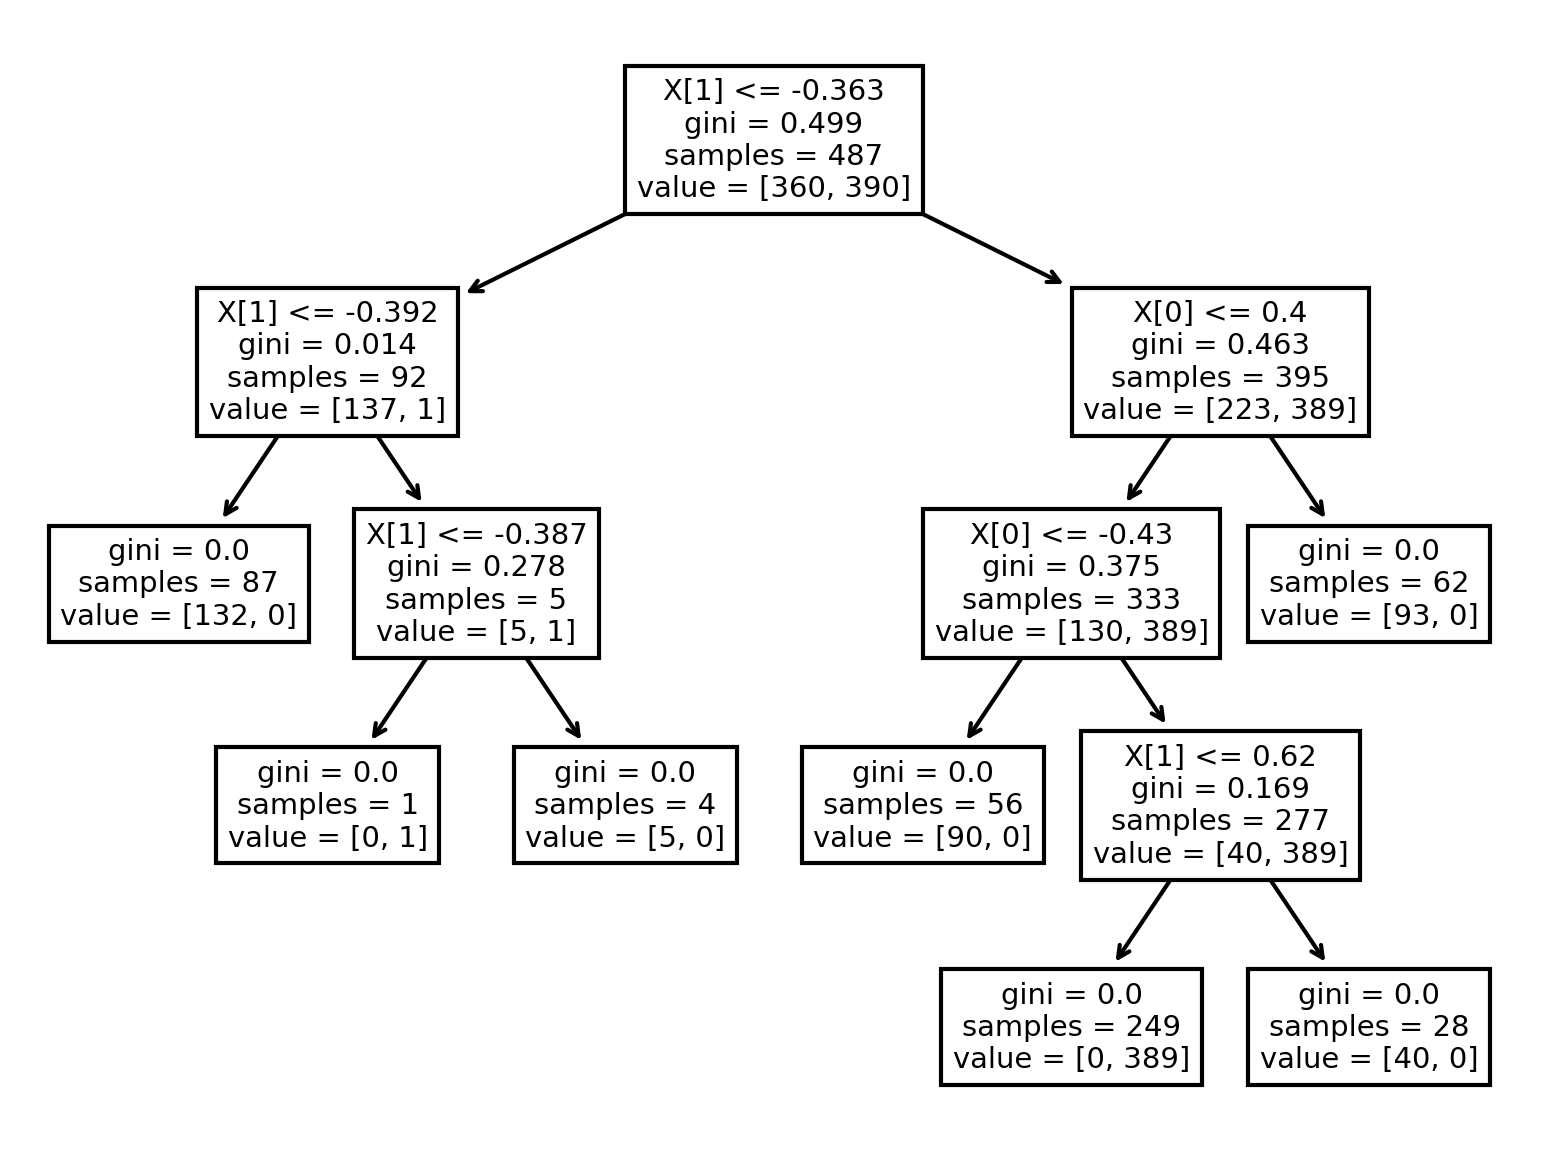

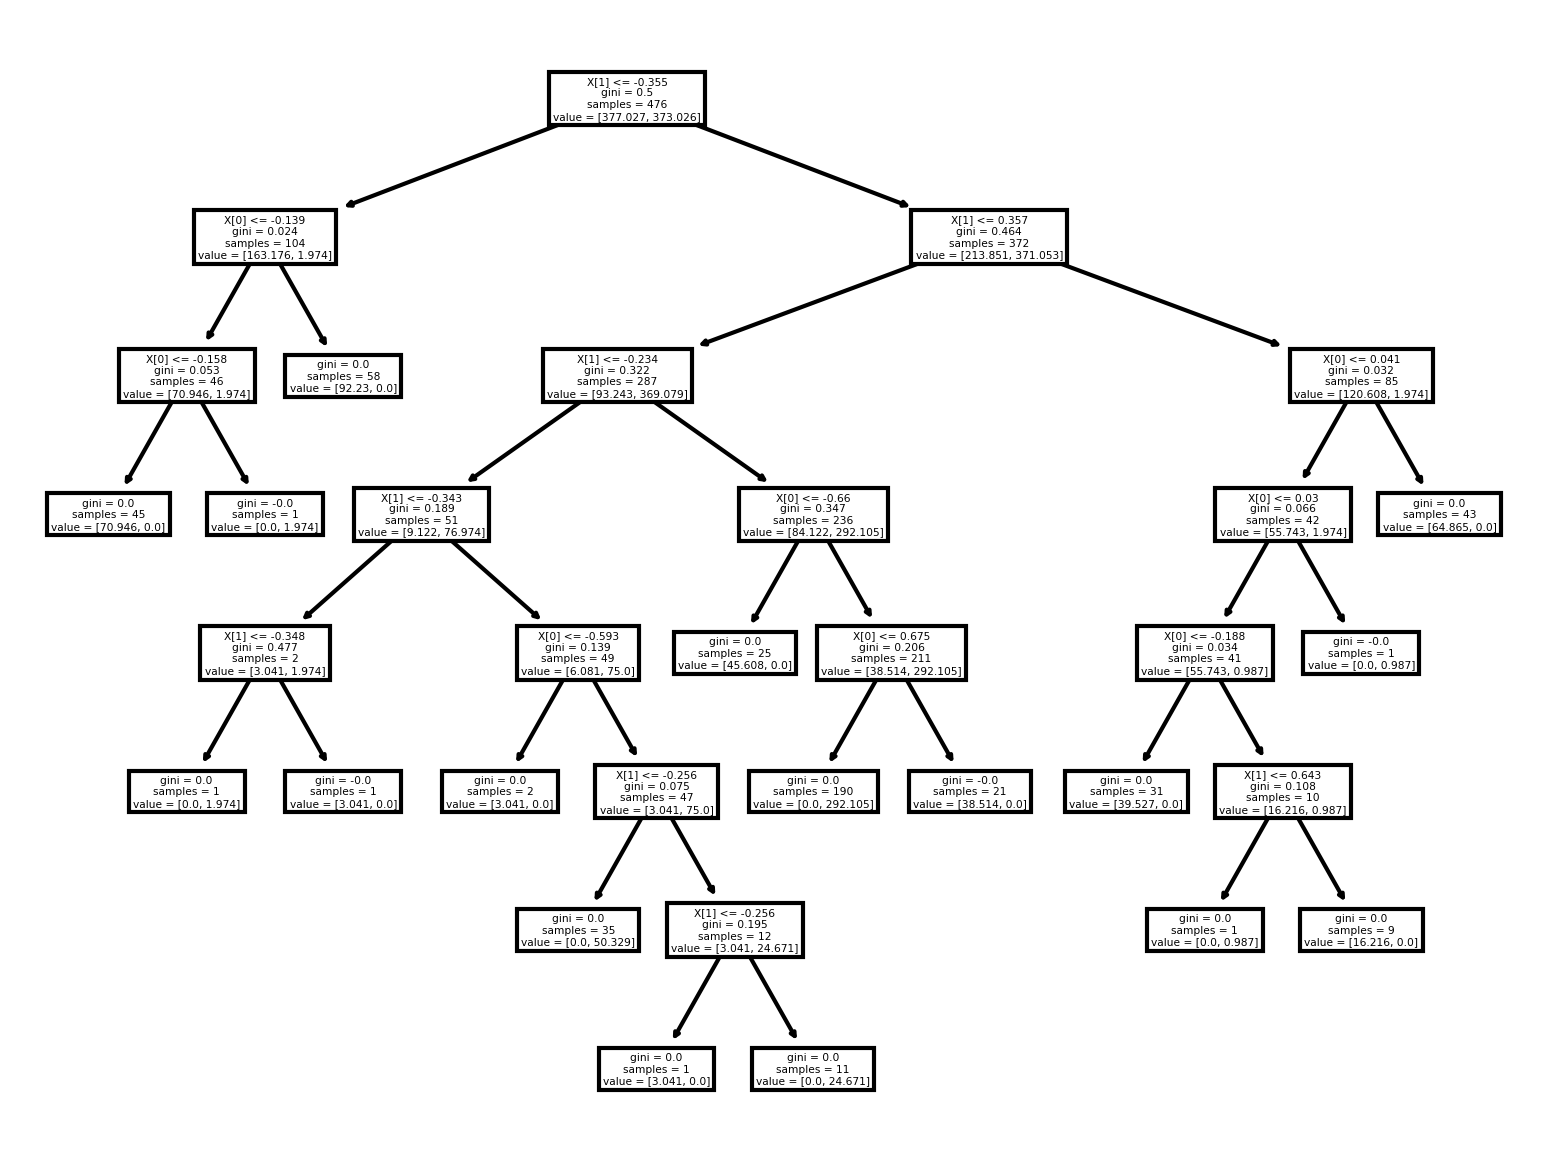

In [15]:
c = w10hw()
c.generate_data(show=True)
# c.show_data_info(shape=True, dtype=True)
c.split_data()
c.build_model(model_name=['DT', 'DT_weighted', 'RF', 'RF_weighted'])
c.train_model()
c.test_model()
c.test_overfit()
# print(c.y_acc_diff)
c.plot_DTRF_tree(save=True)

## Divide data

### DT

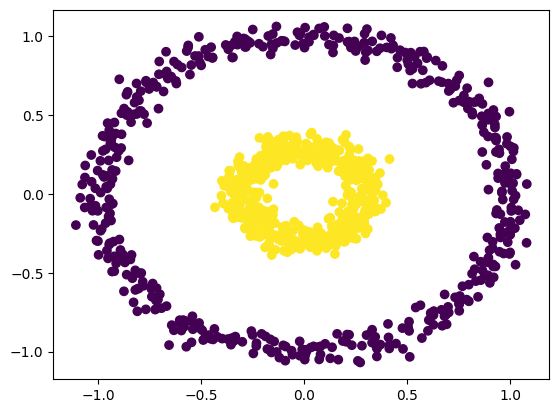

In [16]:
c.plot_divided_data(show=True)
plt.
